# **Laboratorio 1, A Titanic Probability.**
#### El 15 de abril de 1912 el transatlántico de pasajeros más grande jamas construido "Titanic" chocó con un iceberg durante su viaje inagural. En su hundimiento murieron 1502 pasajeros de los 2224 que iban a bordo incluyendo a su tripulación.

#### El conjunto de datos "titanic.csv" contiene datos de 887 pasajeros reales del Titanic. Cada fila representa a una persona. 

#### Las columnas describen diferentes atributos sobre la persona: 


- sobrevivió (Survived)
- clase de pasajero (Pclass)  
- nombre (Name)
- sexo (Sex)
- edad (Age)
- hermanos/conyugues abordo (Siblings/Spouses aboard) 
- padres/niños abordo (Parents/children Aboard)  
- tarifa que pagó en £s (Fare).

## **Cargando bibliotecas de python**

In [132]:
import pandas as pd #se importan el modulo panda para el trabajo con el DataSet
import matplotlib.pyplot as plt #para plotear graficas
import pandas_profiling #los siguientes para generar el ProfileReport
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import seaborn as sns #para graficar

## **Cargando Datos**

In [133]:
df = pd.read_csv('titanic.csv',sep=',')#notar que los archivos estan separados por coma no por punto y coma
df.head() #para comprobar como cargaron los datos

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [134]:
df.info()#identificando el tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


#### Los Dtype estan bien asignados siendo enteros, tipo coma flotante y objetos para las cadenas
#### Podemos observar que se tienen 5 tipos de datos cuantitativos:

- Age
- Siblings/Spouses Aboard
- Parents/Children Aboard
- Fare

#### Y los otros 3 son cualitativos nominales:
- Survived 
- Pclass
- Name
- Sex

#### El tipo Name podria quedar como un identificador unico de cada fila ya que ningun nombre de pasajero se repite, asi moveremos esta columna a la primera posicion de izquierda a derecha
#### Tambien podemos decir que los tipos de datos estan bien asignados a cada variable ademas que no existen elementos nulos.

In [135]:
cols = df.columns.tolist()
reorder_cols = cols[-6:-5] + cols[0:2] + cols[3:] 
df1 = df[reorder_cols] #cambia el orden del DataFrame dejando a Name al principio
df1.columns = ['Name', 'Survived', 'Pclass', 'Sex', 'Age', 'SiblingsSpousesAboard', 'ParentsChildrenAboard', 'Fare'] #Renombrando nombres de columnas para que no tengamos problemas al invocarlas
df1.head() #Asi quedara el DataFrame con el que trabajaremos

,Name,Survived,Pclass,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare
0,Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1,female,38.0,1,0,71.2833
2,Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
4,Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


## **Análisis descriptivo**

### Primero analizaremos las variables cualitativas nominales

### Variable `Pclass`

In [136]:
df1.groupby("Pclass").agg(Frequency=("Pclass", "count")) #se crea la tabla de frecuencias para la variable Pclass

,Frequency
Pclass,
1,216
2,184
3,487


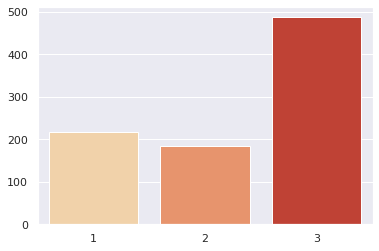

In [137]:
countsPclase = df1.Pclass.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsPclase.index, y=countsPclase.values, palette="OrRd") #Genera el grafico de barras
plt.show() #Muestra el grafico

#### Se puede observar que la mayor frecuencia y por tanto la moda son las personas que ocupan la clase tres

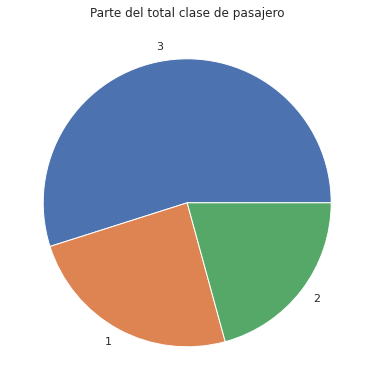

In [138]:
PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total clase de pasajero")
plt.pie(countsPclase.values[:PLOT_SIZE], labels = countsPclase.index[:PLOT_SIZE])
plt.show()

#### La tercera clase es la que habia en mayor cantidad en esta muestra de 887 pasajeros

### Variable `Sex`

In [139]:
(df1.groupby("Sex").agg(Frequency=("Sex", "count"))) #Muestra la tabla de frecuencia

,Frequency
Sex,
female,314
male,573


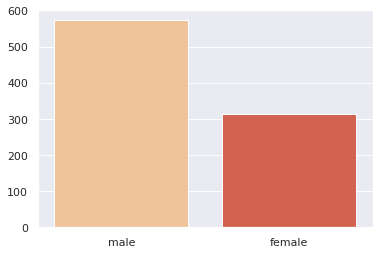

In [140]:
countsSex = df1.Sex.value_counts()
sns.set(color_codes = True) 
sns.barplot(x = countsSex.index, y = countsSex.values, palette = "OrRd") #Genera el grafico de barras
plt.show() #muestra el grafico

#### Se puede observar una mayor cantidad de hombres que mujeres del total de 887 pasajeros

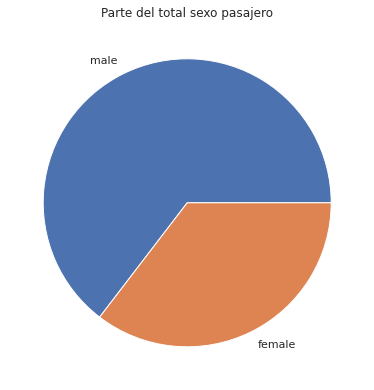

In [141]:
PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total sexo pasajero")
plt.pie(countsSex.values[:PLOT_SIZE], labels = countsSex.index[:PLOT_SIZE])
plt.show()

#### Se puede observar en este grafico de torta la proporcion entre hombres y mujeres de los 887 pasajeros

### Variable `Suvived`

In [142]:
df1.groupby("Survived").agg(Frequency=("Survived", "count")) #se crea la tabla de frecuencias

,Frequency
Survived,
0,545
1,342


#### Donde 0 es no sobrevive y 1 sobrivivio

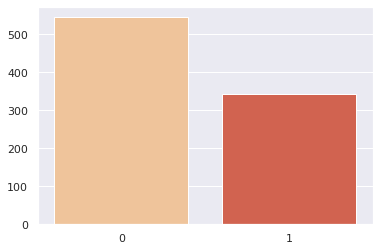

In [143]:
countsSurvived = df1.Survived.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsSurvived.index, y=countsSurvived.values, palette="OrRd")
plt.show()

#### Se observa que la mayor frecuencia la tienen los supervivientes

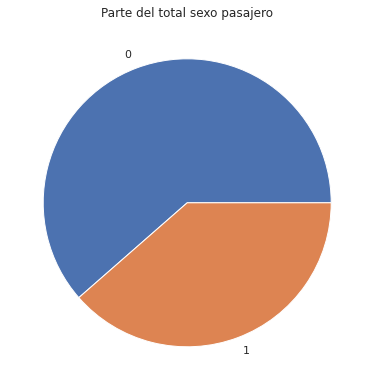

In [144]:

PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total sexo pasajero")
plt.pie(countsSurvived.values[:PLOT_SIZE], labels = countsSurvived.index[:PLOT_SIZE])
plt.show()

#### Aqui la proporcion entre superviviente y no superviviente en este diagrama de torta

### Ahora las variables cuantitativas

### Variable `Age`

In [145]:
(df1.groupby("Age").agg(Frequency=("Age", "count"))) #Muestra la tabla de frecuencia

,Frequency
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


#### Se puede apreciar pasajeros de todas las edades desde bebes hasta ancianos

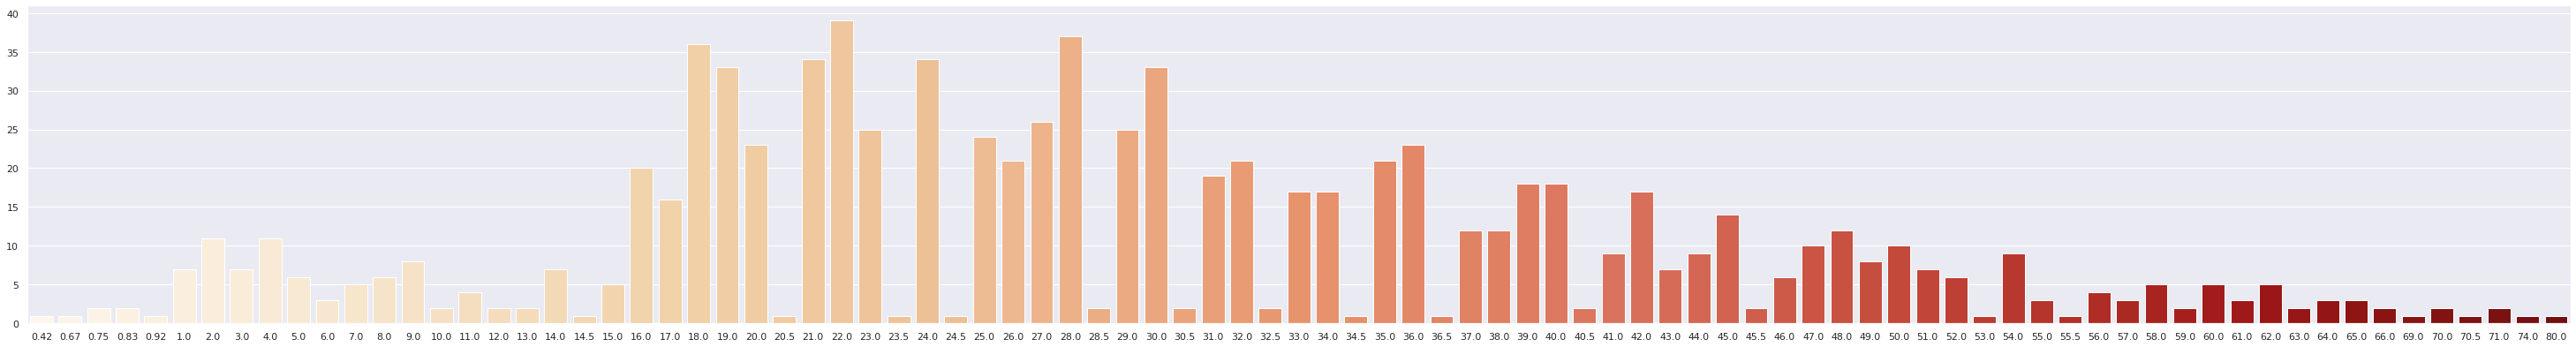

In [146]:
countsAge = df1.Age.value_counts()
fig = plt.figure(figsize = (40,5))
ax = fig.add_axes([1,0,1,1])
sns.set(color_codes = True) 
sns.barplot(x=countsAge.index, y=countsAge.values, palette="OrRd") #Genera el grafico de barras
plt.show()

#### Haciendo doble click izquierdo sobre el grafico se puede ver de mejor manera. Se puede observar que la mayor cantidad de gente esta entre los 18 y 40 años como tambien que los ancianos y bebes son solo unos cuantos. EL minimo de edad es de 0.42 años el maximo de 80 años.

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [147]:
meanAge = df1['Age'].mean() # calculo media
print(meanAge)

29.471443066516347


#### Osea la edad promedio es de unos 29,5 años

In [148]:
medianAge = df1['Age'].median() # Calculo mediana
print(medianAge)

28.0


#### Para los 887 pasajeros la mitad inferior tiene menos que 28 años y la superior mas de esta edad

In [149]:
modeAge = df1['Age'].mode() # Calculo moda
print(modeAge)

0    22.0
Name: Age, dtype: float64


#### 22 años es la edad que mas recurrente en la tripulacion de 887 personas

#### <span style="color: #7A3BDB">Medidas de posición</span>

In [150]:
percentile25Age = df1['Age'].quantile(0.25) # Percentil 25
print(percentile25Age)

20.25


#### EL 25% de todos los datos de edad tiene hasta 20.25 años

In [151]:
percentile75Age = df1['Age'].quantile(0.75) # Percentil 75
print(percentile75Age)

38.0


#### EL 75% de la distribucion de datos se acumula hasta los 38 años

<AxesSubplot:xlabel='Age'>

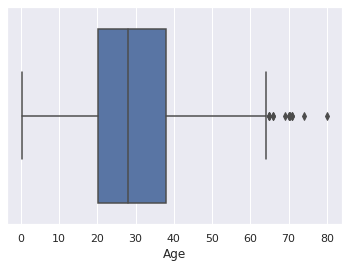

In [152]:
sns.boxplot( x=df["Age"]) #Genera el diagrama de caja y bigote

#### La mediana bordea los 30 años, el primer cuartil los 20 y el tercer quartil los 40 años, su extremo inferior y superior son 0 y casi 65 respectivamente con datos atipicos pasando este extremo, tambien se puede observar que es levemente asimetrico hacia la izquierda y que los datos no estan agrupados.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [153]:
varianceAge = df1['Age'].var()# Calculo Varianza
print(varianceAge)

199.42829701227413


#### La varianza es muy alta esto quiere decir que existe mucha dispersion entre los datos respecto a la media

In [154]:
stAge = df1['Age'].std() # Calculo Desviación estandar
print(stAge)

14.12190840546256


#### La diferencia media entre la distancia de todos los datos a la meda aritmetica es de 14.12 años

In [155]:
cv = stAge / meanAge # Calculo coeficiente 
print(cv)

0.4791726137600303


#### Como cv < 0.5, la media artimetica es representativa de

#### <span style="color: #7A3BDB">Asimetria</span>

In [156]:
df1['Age'].skew()

0.44718857190799916

#### La variable `Age` tiene una asimetria positiva (a la derecha)

#### <span style="color: #7A3BDB">Curtosis</span>

In [157]:
df1['Age'].kurt()

0.2925590867837582

#### La distribucion es Leptocúrtica

### Variable `Siblings/Spouses Aboard`

In [158]:
(df1.groupby("SiblingsSpousesAboard").agg(Frequency=("SiblingsSpousesAboard", "count"))) #Muestra la tabla de frecuencia

,Frequency
SiblingsSpousesAboard,
0,604
1,209
2,28
3,16
4,18
5,5
8,7


#### Se puede observar que la mayor cantidad de personas no llevaba hermanos(as) ni conyuges a bordo y que la maxima cantidad de estas fue hasta de 8 que la tenian 7 tripulantes

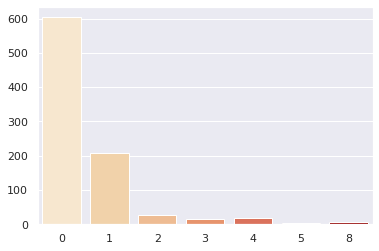

In [159]:
countsSiblingsAboard = df1.SiblingsSpousesAboard.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsSiblingsAboard.index, y=countsSiblingsAboard.values, palette="OrRd")
plt.show()

#### Se aprecia como la frecuencia baja a medida que la cantidad de hermano/conyuge aumenta

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [160]:
meanSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].mean() # calculo media
print(meanSiblingsSpousesAboard)

0.5253664036076663


#### En promedio la gente tiene 0.5 hermano/conyuge redondeando

In [161]:
medianSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].median() # Calculo mediana
print(medianSiblingsSpousesAboard)

0.0


#### Ya que la mayoria de la acumulacion de la distribucion esta en 0, no es apropiado interpretar la mediana

In [162]:
modeSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].mode() # Calculo moda
print(modeSiblingsSpousesAboard)

0    0
Name: SiblingsSpousesAboard, dtype: int64


#### Como ya lo mostraba el grafico ahora el calculo de la moda lo ratifica, la cantidad de hermanos/conyuges que mas pasajeros tienen es 0

#### <span style="color: #7A3BDB">Medidas de posición</span>

In [163]:
percentile25SiblingsSpousesAboard = df1['SiblingsSpousesAboard'].quantile(0.25) # Percentil 25
print(percentile25SiblingsSpousesAboard)

0.0


#### El 25% de los datos es menor o igual a 0

In [164]:
percentile75SiblingsSpousesAboard = df1['SiblingsSpousesAboard'].quantile(0.75) # Percentil 75
print(percentile75SiblingsSpousesAboard)

1.0


#### El 75% de los datos es menor o igual a 1

<AxesSubplot:xlabel='SiblingsSpousesAboard'>

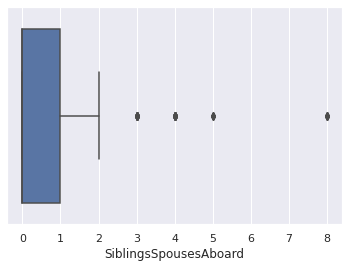

In [165]:
sns.boxplot( x=df1["SiblingsSpousesAboard"]) #genera el diagrama de caja y bigotes

#### La mediana es 0, el primer cuartil 0 y el tercer cuartil 1, su extremo inferior y superior son 0 y 1 respectivamente, tambien posee 4 valores atipicos el mas alejado es el de 8 hermanas/conyuges.
#### Se puede observar que el diagrama es asimetrico a la izquierda, tambien se ver una baja dispersion de los datos.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [166]:
varianceSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].var()# Calculo Varianza
print(varianceSiblingsSpousesAboard)

1.2202926139038686


#### Esto nos demuestra que la distribucion de datos posee una baja dispersion.

In [167]:
stSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].std() # Calculo Desviación estandar
print(stSiblingsSpousesAboard)

1.10466855386757


#### La diferencia media entre la distancia de todos los datos a la meda aritmetica es de 1.10 hermanos/conyugues.

In [168]:
cv = stSiblingsSpousesAboard / meanSiblingsSpousesAboard # Calculo varianza
print(cv)

2.10266310575222


#### Ya que cv > 1 la media no es representativa y por tanto se rechaza como promedio

#### <span style="color: #7A3BDB">Asimetria</span>

In [169]:
df1['SiblingsSpousesAboard'].skew()

3.6867597596973

#### Como la asimetria > 0, es una distribucion asimetrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [170]:
df1['SiblingsSpousesAboard'].kurt()

17.797537149719055

#### Ya que la curtosis > 3, la distribucion es leptocúrtica

### Variable `ParentsChildrenAboard`

In [171]:
(df1.groupby("ParentsChildrenAboard").agg(Frequency=("ParentsChildrenAboard", "count"))) #Muestra la tabla de frecuencia

,Frequency
ParentsChildrenAboard,
0,674
1,118
2,80
3,5
4,4
5,5
6,1


#### Se puede apreciar que la mayor cantidad de personas tienen entre 0 y 1 padre/niño ademas el minimo es tener 0 padres o niños y el maximo de 6 padre/niño.

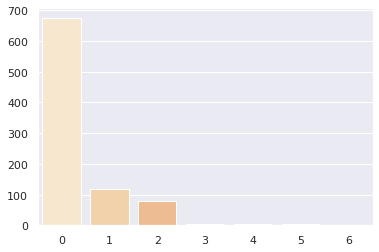

In [172]:
countsParentsChildrenAboard = df1.ParentsChildrenAboard.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsParentsChildrenAboard.index, y=countsParentsChildrenAboard.values, palette="OrRd")
plt.show()

#### Aqui se puede observar de mejor manera como se distribuyen los datos siendo que la mayoria no tenia un padre/niño entre la tripulación.

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [173]:
meanSiblingsSpousesAboard = df1['ParentsChildrenAboard'].mean() # calculo media
print(meanSiblingsSpousesAboard)

0.3833145434047351


#### EL promedio de padre/niño entre los 887 pasajeros es de 0.3 esto esta mas aproximado a 0 padre/niño

In [174]:
medianSiblingsSpousesAboard = df1['ParentsChildrenAboard'].median() # Calculo mediana
print(medianSiblingsSpousesAboard)

0.0


#### No conviene interpretar esta medida ya que su valor es 0 

In [175]:
modeSiblingsSpousesAboard = df1['ParentsChildrenAboard'].mode() # Calculo moda
print(modeSiblingsSpousesAboard)

0    0
Name: ParentsChildrenAboard, dtype: int64


#### La cantidad de personas que tiene 0 padres/niños es la que mas se repite

#### <span style="color: #7A3BDB">Medidas de posición</span>

In [176]:
percentile25ParentsChildrenAboard = df1['ParentsChildrenAboard'].quantile(0.25) # Percentil 25
print(percentile25ParentsChildrenAboard)

0.0


#### El 25% de los datos es menor o igual a 0

In [177]:
percentile75ParentsChildrenAboard = df1['ParentsChildrenAboard'].quantile(0.75) # Percentil 75
print(percentile75ParentsChildrenAboard)

0.0


#### El 75% de los datos es menor o igual a 0

<AxesSubplot:xlabel='ParentsChildrenAboard'>

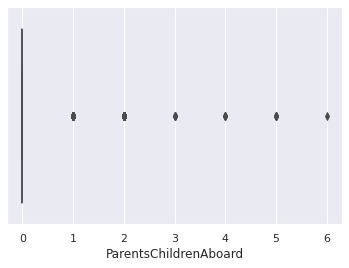

In [178]:
sns.boxplot( x=df1["ParentsChildrenAboard"]) #genera el diagrama de caja y bigotes

#### Los cuartiles y sus extremos son todos 0, los extremos son 1, 2, 3, 4, 5 y 6.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [179]:
varianceParentsChildrenAboard = df1['ParentsChildrenAboard'].var()# Calculo Varianza
print(varianceParentsChildrenAboard)

0.652001191018499


#### Esta distribucion casi no posee dispersión

In [180]:
stParentsChildrenAboard = df1['ParentsChildrenAboard'].std() # Calculo Desviación estandar
print(stParentsChildrenAboard)

0.8074659070316833


#### La diferencia media entre la distancia de todos los datos a la meda aritmetica es de 0.8 padres/niños

In [181]:
cv = stParentsChildrenAboard / meanSiblingsSpousesAboard # Calculo varianza
print(cv)

2.1065360574620677


#### Ya que cv > 1 la media no es representativa y por tanto se rechaza como promedio

#### <span style="color: #7A3BDB">Asimetria</span>

In [182]:
df1['ParentsChildrenAboard'].skew()

2.74119806158299

#### ya que la asimetria es mayor a cero la distribución es asimetrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [183]:
df1['ParentsChildrenAboard'].kurt()

9.72306591995913

#### Ya que curtosis > 3 la distribucion es Leptocúrtica

### Variable `Fare`

In [184]:
(df1.groupby("Fare").agg(Frequency=("Fare", "count"))) #Muestra la tabla de frecuencia

,Frequency
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


#### Se puede ver mucha heterogeneidad entre los datos

#### Ya que son muchos datos no conviene generar un grafico de barras, porque no es posible representarlos bien en este pequeño espacio que brinda el notebook

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [185]:
meanFare = df1['Fare'].mean() # calculo media
print(meanFare)

32.30542018038331


#### El promedio del billete por pasajero es de 32.30 libras esterlinas

In [186]:
medianFare = df1['Fare'].median() # Calculo mediana
print(medianFare)

14.4542


#### El 50% de la tarifa es menor a 14.4542 y el otro 50% mayor a este valor

In [187]:
modeFare = df1['Fare'].mode() # Calculo moda
print(modeFare)

0    8.05
Name: Fare, dtype: float64


#### El valor de tarifa que mas se repite es de 8.05 libras esterlinas

#### <span style="color: #7A3BDB">Medidas de posición</span>

In [188]:
percentile25Fare = df1['Fare'].quantile(0.25) # Percentil 25
print(percentile25Fare)

7.925


#### El 25% de los datos es menor o igual a 7.925 libras esterlinas

In [189]:
percentile75Fare = df1['Fare'].quantile(0.75) # Percentil 75
print(percentile75Fare)

31.1375


#### El 25% de los datos es menor o igual a 31.1375 libras esterlinas

<AxesSubplot:xlabel='Fare'>

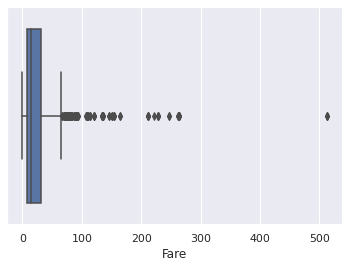

In [190]:
sns.boxplot( x=df["Fare"]) #Diagrama de caja y bitote

#### La mediana es 14.4542 libras, el primer cuartil 7.925 libras y el tercer cuartil 31.1375 libras, su extremo inferior es de 0 libras y extremo superior de 75 libras aproximadamente, y su valor mas atipico es de 512.3292 libras esterlinas. 
#### Se puede observar que el diagrama es asimetrico a la izquierda, tambien tiene una muy alta dispersion de los datos.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [191]:
varianceFare = df1['Fare'].var()# Calculo Varianza
print(varianceFare)

2478.2515464045473


#### Esta distribucion posee una alta dispersión

In [192]:
stFare = df1['Fare'].std() # Calculo Desviación estandar
print(stFare)

49.78204040017391


#### La diferencia media entre la distancia de todos los datos a la meda aritmetica es de 49.782 libras esterlinas por boleto.

In [193]:
cv = stFare / meanFare # Calculo varianza
print(cv)

1.5409810527832992


#### Ya que cv > 1 la media no es representativa y por tanto se rechaza como promedio

#### <span style="color: #7A3BDB">Asimetria</span>

In [194]:
df1['Fare'].skew()

4.777671399019824

#### Ya que la asimetría es mayor que cero esta es una distribucion asimétrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [195]:
df1['Fare'].kurt()

33.26460490128922

#### La curtosis es mayor a 3 por tanto la distribución es Leptocúrtica

## **Mapas de correlacion**

#### <span style="color: #7A3BDB">Correlacion</span>

In [220]:
cols1 = df1.columns.tolist()
reorder_cols1 = cols[4:] 
df2 = df[reorder_cols1] #Reordenamos el DataFrame para dejar solo las variables cuantitativas
df2.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


#### Reordenaremos el DateFrame para dejar solo las variables cuantitativas

In [221]:
correlacionDf2 = df2.corr(method='pearson')
correlacionDf2

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Age,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,-0.193741,0.414244,1.000000,0.215470
Fare,0.112329,0.158839,0.215470,1.000000


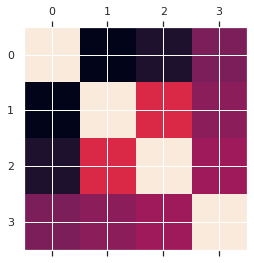

In [228]:
plt.matshow(correlacionDf2)

#### Los colores oscuros representan los valores negativos y los claros a los positivos.
#### El color rojo representa una correlación lineal positiva con las variables Siblings/Spouses Aboard y Parents/Children Aboard

Text(0, 0.5, 'padres/niños abordo')

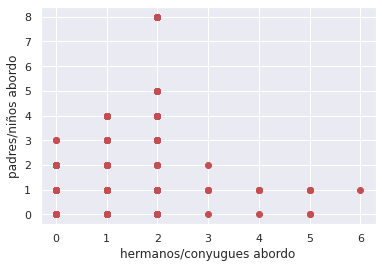

In [235]:
plt.plot(df2["Parents/Children Aboard"], df["Siblings/Spouses Aboard"], "ro")
plt.xlabel("hermanos/conyugues abordo")
plt.ylabel("padres/niños abordo")

#### El grafico no muestra mucha correlacion entre ambas variables

## **Conclusiones**

- Como se dijo mas arriba la variable `Name` podria quedar como un identificador unico.
- Al menos para este analisis las variables cualitativas no dieron mucha información en cambio en las cuantitativas todas mostraron mucha asimetria y dispersion de los datos a excepcion de la variable `Age`, quiza teniendo al total de pasajeros de este barco se puedan tener mejores distribuciones.
- Las variables `Parents/Children Aboard` y `Siblings/Spouses Aboard` se podrian juntar y hacer una sola llamada parientes esto dada su correlacion y el sentido que tienen.
